In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, HTML

First we discretize the meter stick into `n_divs` equal divisions.

In [2]:
n_divs = 1000
x = np.linspace(0, 1, num=n_divs)

We can also calculate the discretized version of the exact solution.

In [3]:
exact = np.zeros([n_divs, 1])
for i, val in enumerate(x):
    if val<0.2:
        exact[i] = 5/9 + 25/9*val
    elif val>0.8:
        exact[i] =  30/9 - 25/9*val
    else:
        exact[i] = 10/9

We can now define our initial probability distributions for the grasshopper. I'll use two separate distributions: a uninform distribution where the grasshopper is equally likely to be anywhere on the meter stick and a delta-function distribution where the grasshopper is localized to the center of the meter stick.

In [4]:
unif = np.ones([n_divs, 1])

delta = np.zeros([n_divs, 1])
delta[int(n_divs/2)] = 1/(x[1]-x[0])

Now the main part of the simulation. We need to define the update matrix which updates the probability distribution each time the grasshopper jumps. The ij-th entry specifies the probability that the grasshopper will jump to $x_i$ given that it starts at $x_j$.

In [5]:
update = np.zeros([n_divs, n_divs])
for i, x1 in enumerate(x):
    for j, x2 in enumerate(x):
        if np.abs(x1-x2)<0.2:
            update[j, i] = 1
    update[:, i] = update[:, i]/np.sum(update[:, i])

We can now simulate the probability distributions evolution by repeatedly applying the update matrix. Let's make this into an animation.

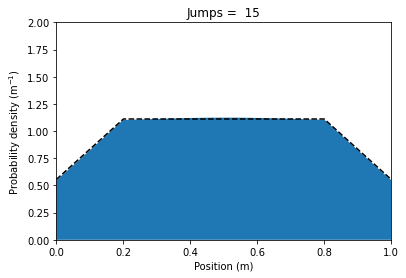

In [6]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 2))
ax.plot(x, exact, '--k')
ax.set_xlabel("Position (m)")
ax.set_ylabel("Probability density (m$^{-1}$)")
fill = ax.fill_between(x, 1)

def animate_unif(i):
    ax.set_title(f"Jumps =  {i}")
    path = fill.get_paths()[0]
    new_verts = np.dot(np.linalg.matrix_power(update, i), unif)
    for j, val in enumerate(new_verts):
        path.vertices[j+1, 1] = val
    return (fill,)

def animate_delta(i):
    ax.set_title(f"Jumps =  {i}")
    path = fill.get_paths()[0]
    new_verts = np.dot(np.linalg.matrix_power(update, i), delta)
    for j, val in enumerate(new_verts):
        path.vertices[j+1, 1] = val
    return (fill,)

anim_unif = animation.FuncAnimation(fig, animate_unif, frames=11, interval=333, blit=True)
anim_delta = animation.FuncAnimation(fig, animate_delta, frames=16, interval=333, blit=True)

with open("unif.html", "w") as f:
    print(anim_unif.to_jshtml(), file=f)
anim_unif.save("unif.gif", dpi=300)
with open("delta.html", "w") as f:
    print(anim_delta.to_jshtml(), file=f)
anim_delta.save("delta.gif", dpi=300)

The below widget shows the evolution of the uniform distribution.

In [7]:
display(HTML(anim_unif.to_jshtml()))

The below widget shows the evolution of the delta-function distribution.

In [8]:
display(HTML(anim_delta.to_jshtml()))

We can also check the convergence of each distribution to the exact solution. The error for a distribution is measured by calculating the absolute error for each bin and then averaging across the all bins.

In [9]:
n_converg = 21
unif_converg = np.zeros(n_converg)
delta_converg = np.zeros(n_converg)

for i in range(n_converg):
    unif_converg[i] = np.sum(np.abs(np.dot(np.linalg.matrix_power(update, i), unif) - exact))
    delta_converg[i] = np.sum(np.abs(np.dot(np.linalg.matrix_power(update, i), delta) - exact))

unif_converg /= n_divs
delta_converg /= n_divs

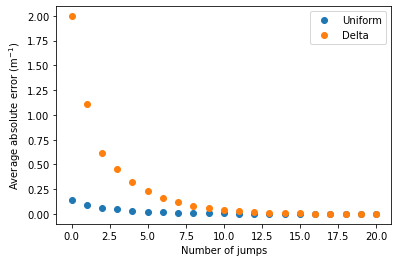

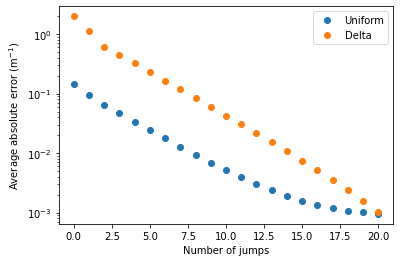

In [10]:
plt.plot(range(n_converg), unif_converg, 'o', label = "Uniform")
plt.plot(range(n_converg), delta_converg, 'o', label = "Delta")
plt.legend()
plt.xlabel("Number of jumps")
plt.ylabel("Average absolute error (m$^{-1}$)")
plt.show()

plt.plot(range(n_converg), unif_converg, 'o', label = "Uniform")
plt.plot(range(n_converg), delta_converg, 'o', label = "Delta")
plt.semilogy()
plt.legend()
plt.xlabel("Number of jumps")
plt.ylabel("Average absolute error (m$^{-1}$)")
plt.show()

Both distributions converge roughly exponentially to the exact solution, with the uniform distribution starting closer to the exact solution.